<a href="https://colab.research.google.com/github/SLKS-CODE/codealpha_tasks2/blob/main/sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()  # Upload your kaggle.json or kaggle.json file

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lakshanakamalis","key":"552075240ea432f1007211e20d0bb5f9"}'}

In [ ]:
import os

# Create the directory for Kaggle configuration
os.makedirs('/root/.kaggle', exist_ok=True)

# Move the uploaded kaggle.json to the correct location
!mv kaggle.json /root/.kaggle/

# Set proper permissions
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d bumba5341/advertisingcsv
!unzip advertisingcsv.zip -d advertising_dataset

Dataset URL: https://www.kaggle.com/datasets/bumba5341/advertisingcsv
License(s): unknown
  0% 0.00/2.26k [00:00<?, ?B/s]
100% 2.26k/2.26k [00:00<00:00, 3.82MB/s]
Archive:  advertisingcsv.zip
  inflating: advertising_dataset/Advertising.csv  


In [ ]:
#STEP1:
# Load the dataset
data = pd.read_csv('/content/advertising_dataset/Advertising.csv')  # Update the file path if needed
print(data.head())  # View the first few rows
print(data.info())  # Check for missing values and data types
print(data.describe())  # View summary statistics

   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None
       Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000

In [ ]:
#STEP2:
# Check for null values
print("\nNull values check:")
print(data.isnull().sum())


Null values check:
Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64


In [ ]:
#STEP3: Check for duplicate rows
print("\nDuplicated rows count:", data.duplicated().sum())


Duplicated rows count: 0


In [ ]:
# STEP4:Splitting features (TV, Radio, Newspaper) and target (Sales)
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

In [ ]:
#STEP5: Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTotal dataset size: {len(X)}")
print(f"Training dataset size: {len(X_train)}")
print(f"Testing dataset size: {len(X_test)}")


Total dataset size: 200
Training dataset size: 160
Testing dataset size: 40


In [ ]:
#STEP6: Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
#STEP7: Make predictions
y_pred = model.predict(X_test)

In [ ]:
#STEP8:Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"\nModel Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Model Evaluation Metrics:
Mean Squared Error (MSE): 0.59
R-squared (R2): 0.98


In [ ]:
#STERP9: Binning the regression predictions and actual values to simulate classification
bins = [0, 5, 10, 15, 20, 25]  # Adjust based on Sales ranges
labels = ['Low', 'Below Average', 'Average', 'Above Average', 'High']
y_test_class = pd.cut(y_test, bins=bins, labels=labels)
y_pred_class = pd.cut(y_pred, bins=bins, labels=labels)

# Ensure no missing values from the binning process
# y_test_class = y_test_class.cat.add_categories(['Unknown']).fillna('Unknown') # This line might also need correction
y_test_class = y_test_class.cat.add_categories(['Unknown']).fillna('Unknown')
y_pred_class = y_pred_class.add_categories(['Unknown']).fillna('Unknown') # Remove .cat since y_pred_class is already Categorical

In [ ]:
#STEP10:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Accuracy
accuracy = accuracy_score(y_test_class, y_pred_class)

# Precision, Recall, F1-Score
precision = precision_score(y_test_class, y_pred_class, average='weighted', zero_division=1)
recall = recall_score(y_test_class, y_pred_class, average='weighted', zero_division=1)
f1 = f1_score(y_test_class, y_pred_class, average='weighted')

# Print evaluation metrics
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-Score: {f1 * 100:.2f}%")

Accuracy: 92.50%
Precision: 95.25%
Recall: 92.50%
F1-Score: 93.71%


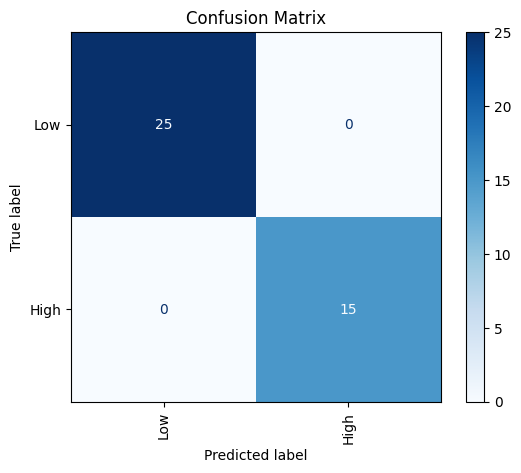

In [ ]:
#STEP11:
# Define a threshold to categorize sales
threshold = data['Sales'].mean()  # Example threshold: average sales

# Convert y_test and y_pred into classes
y_test_class = ['High' if sale > threshold else 'Low' for sale in y_test]
y_pred_class = ['High' if sale > threshold else 'Low' for sale in y_pred]

# Define class labels
labels = ['Low', 'High']

# Now you can create the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_class, y_pred_class, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap="Blues", xticks_rotation='vertical')
plt.title("Confusion Matrix")
plt.show()

In [ ]:
#STEP12: Add this import statement at the beginning of your code
from sklearn.metrics import classification_report

print("\nClassification Report:")
print(classification_report(y_test_class, y_pred_class, target_names=labels))


Classification Report:
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00        15
        High       1.00      1.00      1.00        25

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



<Axes: ylabel='None'>

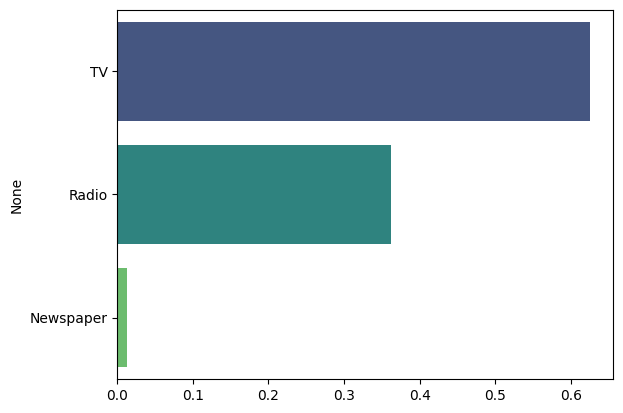

In [ ]:
#STEP13:
sns.barplot(x=importances, y=features, hue=features, palette="viridis", dodge=False, legend=False)
# dodge=False prevents grouping, legend=False hides the redundant legend

In [ ]:
#STEP14: Predict for a sample input
sample_input = pd.DataFrame({'TV': [230.1], 'Radio': [37.8], 'Newspaper': [69.2]})
predicted_sales = model.predict(sample_input)[0]
print(f"\nPredicted Sales for input {sample_input.to_dict(orient='records')[0]}: {predicted_sales:.2f}")


Predicted Sales for input {'TV': 230.1, 'Radio': 37.8, 'Newspaper': 69.2}: 21.99
